 # Airlines are commonly known to utilize overbooking to earn extra profits or avoiding losses over the fact that not all passenger will show up on boarding day. We will use a simple scenario here to demonstrate how airline might do so.
#### 1. The passenger travel in this scenario is assumed to be alone. Factors such as weather, festival season, time of the flight and other external factors is assumed to not affecting our model.
#### 2. Historically passenger showed up rate is 80%
#### 3. The number of ticket to be sold without overbooking is 200, and the cost of a ticket is 120.
#### 4. The management of the airline is planning to overbook the seats by additional 50 tickets to achieve full capacity and avoid losses. Hence the total ticket to be sold is 250. (0.8x = 200, hence x = 250)
#### 5. However the risk is if more than 200 passengers showed on boarding day, the airline must compensate each bumped passenger by $300.


#### B) The revenue without overbook is 24,000 (120 * 200), while for best case scenario where 250 tickets are sold and 50 no show passengers is 30,000 (120 * 250).  Show the revenue calculation for worst case scenario

##### The worst case scenario where 250 tickets are sold and all passengers appeared $120 *250 -50 *300 = 15000$
##### I assume that all tickets are sold. Of course the worst case when the company sold nothing. 

##### C) Using python library from matplotlib/seaborn and scipy.stats write codes to plot the probability mass function (pmf) for the above scenario. Your diagram should closely resemble image below.

In [72]:
from scipy import stats
from scipy.stats import binom
import numpy as np
import pandas as pd

In [82]:
# Let's display plots in jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

#set up default size of plots
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [83]:
f = lambda x: binom.pmf(x, 250, 0.8)
df = pd.DataFrame({
    'showed_up': np.arange(170, 251),
    'pmf': np.vectorize(f)(np.arange(170, 251))
})

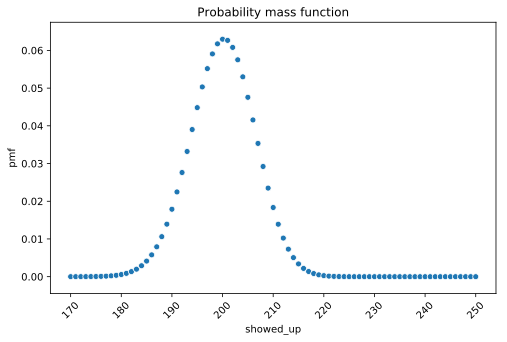

In [104]:
#sns.axes_style({'xtick.direction': 'in'})
plt.xticks(rotation = 45)
plt.title('Probability mass function')
sns.scatterplot(x = 'showed_up', y = 'pmf', data = df, palette = 'Blues_d')
plt.show()

##### D) What is the probability of passengers showed up for:
###### i) 200
###### i) 250

In [108]:
for i in [200, 250]:
    print('the probability for {} passengers showed up is {}'.format(i, round(binom.pmf(i, 250, 0.8), 10)))

the probability for 200 passengers showed up is 0.0629680239
the probability for 250 passengers showed up is 0.0


##### E) What is the expected revenue of 250 ticket sold?

In [63]:
exp = 0
for i in range(251):
    exp = exp + binom.pmf(i, 250, 0.8) * (i * 120 - max(i - 200, 0) * 300)
print('expected revenue of 250 ticket sold is {} USD'.format(round(exp,2)))

expected revenue of 250 ticket sold is 23244.38 USD


##### F) Does the 250 overbook tickets is the most optimal number? Run a simulation of expected revenue from 201 to 260 tickets sold.

In [117]:
def exp_revenue(sold):
    exp = 0
    for i in range(sold + 1):
        exp = exp + binom.pmf(i, sold, 0.8) * (i * 120 - max(i - 200, 0) * 300)
    return round(exp, 2)

max_rev = 0

rev = pd.DataFrame({'tickets':np.arange(201, 261), 'revenue': np.vectorize(exp_revenue)(np.arange(201, 261))})
tickets = rev.loc[rev['revenue'] == rev['revenue'].max(), 'tickets'].values[0]
revenue = rev.loc[rev['revenue'] == rev['revenue'].max(), 'revenue'].values[0]
print('the most optimal number is {} with expected revenue is ${}'.format(tickets, revenue))

the most optimal number is 248 with expected revenue is $23274.19


##### G) Plot the number of ticket sold against expected revenue and draw a vertical line to mark the optimal number of ticket sold.

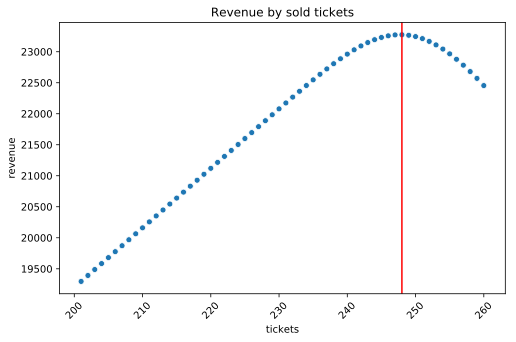

In [124]:
plt.xticks(rotation = 45)
plt.title('Revenue by sold tickets')
plt.axvline(tickets, color = 'r')
sns.scatterplot(x = 'tickets', y = 'revenue', data = rev, palette = 'Blues_d')
plt.show()

##### H) By using the optimal number of ticket from (f) and with the showed up rate of 80%, generate 10,000 random numbers to simulate the possible number of passenger show up . (hint : .rvs(n, p, size=10000))

In [110]:
r = binom.rvs(n = 248, p = 0.8, size = 1000)

##### I) What is the min, max and 95% percentile of the number of passenger show up from (g)?

In [111]:
stats.describe(r)

DescribeResult(nobs=1000, minmax=(180, 218), mean=198.81, variance=36.76866866866867, skewness=0.09796961738585316, kurtosis=0.03479368242243641)

In [112]:
print('Min of the number of passangers showed up is {}'.format(np.min(r)))
print('Max of the number of passangers showed up is {}'.format(np.max(r)))
print('95% percentile of the number of passangers showed up is {}'.format(np.percentile(r, 95)))

Min of the number of passangers showed up is 180
Max of the number of passangers showed up is 218
95% percentile of the number of passangers showed up is 209.0


##### J) What if the passenger isnâ€™t travel alone, describe how it affects the model.

###### In this case events cease to be independent. So we can't use binomial distribution anymore

##### K) For the solutions, you should as much as possible minimize the usage of loop and instead replaced with matrix computation (i.e numpy multiplication).

###### DONE

##### I) From your observation or research on Involve Asia, how do you think this scenario relate to the business model?

#### Advertisers may have a limited number of offers. At the same time they can  sell more considering the fact that not all customers will use/take of the paid product.